<a href="https://colab.research.google.com/github/nishvit/DNN/blob/master/Asgnmnt4_dnn_torch_pt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

In [125]:
transform = transforms.Compose ([transforms.ToTensor()])

trainset = MNIST (root = '/content/data/', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader (trainset, batch_size = 128, shuffle = True, num_workers = 2)

testset = MNIST (root = '/content/data/', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader (testset, batch_size = 128, shuffle = False, num_workers = 2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

In [126]:
dataiter = iter (trainloader)
images, labels = dataiter.next ()
print (type (images))
print (images.shape)
print (labels.shape)
print (labels)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])
tensor([6, 5, 6, 0, 9, 0, 3, 2, 0, 2, 6, 9, 2, 1, 9, 3, 0, 5, 7, 8, 4, 6, 1, 1,
        9, 7, 4, 9, 7, 6, 1, 6, 6, 5, 5, 9, 1, 6, 9, 0, 9, 3, 0, 2, 4, 4, 0, 1,
        3, 8, 5, 4, 1, 2, 8, 3, 9, 9, 8, 3, 6, 3, 2, 0, 6, 8, 3, 6, 9, 7, 4, 4,
        3, 2, 6, 7, 5, 3, 0, 2, 6, 4, 0, 9, 0, 5, 4, 1, 7, 2, 2, 9, 5, 6, 4, 0,
        6, 0, 5, 3, 1, 7, 7, 1, 1, 8, 0, 2, 6, 4, 7, 2, 2, 4, 1, 0, 2, 1, 9, 4,
        4, 7, 5, 8, 1, 0, 3, 8])


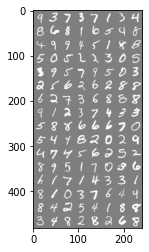

    9     3     7     3


In [127]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow (img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy ()
    plt.imshow (np.transpose (npimg, (1, 2, 0)))
    plt.show ()

# get some random training images
dataiter = iter (trainloader)
images, labels = dataiter.next ()

# show images
imshow (torchvision.utils.make_grid (images))
# print labels
print(' '.join ('%5s' % classes[labels[j]] for j in range (4)))

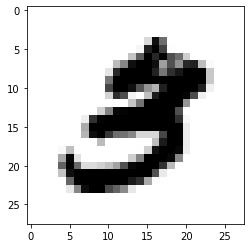

In [128]:
plt.imshow(images[63].numpy().squeeze(), cmap='gray_r');

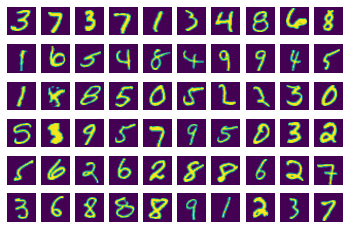

In [129]:
figure = plt.figure()
num_of_images = 60
for index in range (1, num_of_images + 1):
    plt.subplot (6, 10, index)
    plt.axis ('off')
    plt.imshow (images[index].numpy().squeeze())

In [130]:
import torch.nn as nn
import torch.nn.functional as F

class Net (nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d (in_channels = 1, out_channels = 32, kernel_size = 11, stride = 1, padding = 0) #18x18x32
        self.pool1 = nn.MaxPool2d (2, 2) # max pool 9x9x32
        self.conv2 = nn.Conv2d (in_channels = 32, out_channels = 10, kernel_size = 5, stride = 1, padding = 0) #5x5x10
        self.bn2=nn.BatchNorm2d (10)
        #self.dropout1=nn.Dropout2d(p=0.1)
        self.conv3 = nn.Conv2d (in_channels = 10, out_channels = 10, kernel_size = 5, stride = 1, padding = 0) #1x1x10
        self.bn3=nn.BatchNorm2d (10)       
        #self.pool2 = nn.MaxPool2d (2, 2) # max pool 1x1x10
        self.linear = nn.Linear (in_features = 10, out_features = 10) #array of 10 variables 

    def forward (self, x):
        x = F.relu(self.conv1 (x))
        x = self.pool1(x)
        x = F.relu(self.bn2(self.conv2 (x)))
        x = F.relu(self.bn3((self.conv3 (x))))
        x = x.reshape (-1, 10 * 1 * 1)
        x = self.linear (x)
        #x = F.softmax (x, dim = 0)
        return x

net = Net()


pytorch_total_params = sum(p.numel() for p in net.parameters())
print (pytorch_total_params)
print(list(p.numel() for p in net.parameters()))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)
net.to (device)

14574
[3872, 32, 8000, 10, 10, 10, 2500, 10, 10, 10, 100, 10]
cuda


Net(
  (conv1): Conv2d(1, 32, kernel_size=(11, 11), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 10, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(10, 10, kernel_size=(5, 5), stride=(1, 1))
  (bn3): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=10, out_features=10, bias=True)
)

In [ ]:
import time
import torch.optim as optim
from tqdm import notebook

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.003)
epochs = 10

tqdm_e = notebook.tqdm ([i + 1 for i in range (epochs)], total = epochs)
for i, e in enumerate (tqdm_e):
    time0 = time.time ()

    running_loss = 0
    print ('Training for Epoch ' + str (e) + '...')
    tqdm_tl = notebook.tqdm (trainloader, total = int (len (trainloader)))
    for images, labels in (tqdm_tl):
    #for images, labels in trainloader:
        # Training pass
        optimizer.zero_grad()
        
        output = net (images.cuda())
        loss = criterion (output, labels.cuda())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()

    correct_count, all_count = 0, 0
    print ('Computing Accuracy on Training set...')
    tqdm_vl = notebook.tqdm (trainloader, total = int (len (trainloader)))
    for images, labels in tqdm_vl:
      true_label = labels.numpy()
      with torch.no_grad():
          logps = net (images.cuda())

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      for j in range (ps.shape[0]):
        probab = list (ps.cpu().numpy()[j])
        pred_label = probab.index(max(probab))
        if (true_label[j] == pred_label):
          correct_count += 1
        all_count += 1
    train_acc = correct_count / all_count

    print ('Computing Accuracy on Test set...')
    correct_count, all_count = 0, 0
    tqdm_vl = notebook.tqdm (testloader, total = int (len (testloader)))
    for images, labels in tqdm_vl:
      true_label = labels.numpy()
      with torch.no_grad():
          logps = net (images.cuda())

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      for j in range (ps.shape[0]):
        probab = list (ps.cpu().numpy()[j])
        pred_label = probab.index(max(probab))
        if (true_label[j] == pred_label):
          correct_count += 1
        all_count += 1
    test_acc = correct_count / all_count

    print("Epoch {} - Time Taken: {}, Training loss: {} - Train Accuracy: {} Test Accuracy: {}".format(e, (time.time ()-time0)/60, running_loss/len(trainloader), train_acc, test_acc))
    if correct_count / all_count > 0.98:
      optimizer = optim.Adam(net.parameters(), lr = 0.01)

Training for Epoch 1...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 1 - Time Taken: 0.2190976063410441, Training loss: 0.3712615260659759 - Train Accuracy: 0.9849833333333333 Test Accuracy: 0.9849
Training for Epoch 2...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 2 - Time Taken: 0.2217261830965678, Training loss: 0.07721002977579705 - Train Accuracy: 0.9867666666666667 Test Accuracy: 0.9876
Training for Epoch 3...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 3 - Time Taken: 0.2165932297706604, Training loss: 0.053400887117814475 - Train Accuracy: 0.9852666666666666 Test Accuracy: 0.982
Training for Epoch 4...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 4 - Time Taken: 0.2153372605641683, Training loss: 0.04073808663514759 - Train Accuracy: 0.9907166666666667 Test Accuracy: 0.9899
Training for Epoch 5...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 5 - Time Taken: 0.21651318073272705, Training loss: 0.034259593957709444 - Train Accuracy: 0.99155 Test Accuracy: 0.9895
Training for Epoch 6...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 6 - Time Taken: 0.21695430278778077, Training loss: 0.030500562879433635 - Train Accuracy: 0.99315 Test Accuracy: 0.9896
Training for Epoch 7...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 7 - Time Taken: 0.2172072211901347, Training loss: 0.026369544813461078 - Train Accuracy: 0.9936333333333334 Test Accuracy: 0.99
Training for Epoch 8...


In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()
    print (ps / 100000)
    fig, (ax1, ax2) = plt.subplots(figsize=(6,12), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')

    ax2.barh(np.arange(10), ps / 100000)
    ax2.set_aspect(1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 10)
    plt.tight_layout()

In [ ]:
images, labels = next (iter (testloader))

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = net (images.cuda())

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp (logps)
probab = list (ps.cpu().numpy()[4])
print ("Predicted Digit =", probab.index (max (probab)))
view_classify (images[4], ps[4])
print(labels)

In [ ]:
layer_dict = net.state_dict ()